
# Introduction

Lego is a household name across the world, supported by a diverse toy line, hit movies, and a series of successful video games. In this project, we are going to explore a key development in the history of Lego: the introduction of licensed sets such as Star Wars, Super Heroes, and Harry Potter.

Before diving into our analysis though, let's become familiar with the two datasets that will help you with this project:


#### datasets/lego_sets.csv
#### set_num
: A code that is unique to each set in the dataset. This column is critical, and a missing value indicates the set is a duplicate or invalid!
#### set_name:
A name for every set in the dataset (note that this can be the same for different sets).
year: The date the set was released.
#### num_parts:
The number of parts contained in the set. This column is not central to our analyses, so missing values are acceptable.
#### theme_name:
The name of the sub-theme of the set.
#### parent_theme:
The name of the parent theme the set belongs to. Matches the `name` column of the `parent_themes` csv file.

datasets/parent_themes.csv
#### id:
A code that is unique to every theme.
name:
The name of the parent theme.
#### is_licensed:
A Boolean column specifying whether the theme is a licensed theme.
From here on out, it will be your task to explore and manipulate the existing data until you are able to answer the two questions described in the instructions panel. Feel free to add as many cells as necessary. Finally, remember that you are only tested on your answer, not on the methods you use to arrive at the answer!


# Problem definition
You are a data analyst for the lego company and you hve been tasked with identifying the following


1)What percentge of  the licenced sets released by the company were Star Wars themed?
result in percentage(as an int) 

2)In which year did the Star wars themed sets lose it's place as the top selling set for the company  
result in year(int)

3)What was the highest sales figures that legos achieved in all the years tahtthe Data is available 

## What is the use of this data?
1)To Showcase the impact of the branding and Intellectual Property  in the sales of our sets

2)To hone in on the most successful years and the years with highest failure so as to learn from
it's marketing failures and successes and  accordingly 


Things I learnt through this project 
1)Data cleaning

2)Improved pandas functionality

3)Working with real life data and solving real life problems 


# Let's break down the entire proess step by step 

### Let's import the pandas,the data and get a brief head of the Data

In [52]:
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.ticker import StrMethodFormatter


In [53]:
df =  pd.read_csv('https://raw.githubusercontent.com/KeithGalli/lego-analysis/master/datasets/lego_sets.csv')
parent = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/lego-analysis/master/datasets/parent_themes.csv')

In [54]:
df

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space
...,...,...,...,...,...,...
11981,NaN,NaN,2014,NaN,NaN,Minecraft
11982,NaN,NaN,2006,NaN,NaN,Super Heroes
11983,NaN,NaN,2017,NaN,NaN,Minecraft
11984,NaN,NaN,2017,8.0,NaN,Super Heroes


### Above there are a lot of rows with missing values,Let's eliminate some of them 

In [55]:
parent.head(10)

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False
5,147,Pirates,False
6,155,Modular Buildings,False
7,158,Star Wars,True
8,186,Castle,False
9,204,Designer Sets,False


In [56]:
Star=parent['name'].str.contains('Star Wars')

In [57]:
Star

0      False
1      False
2      False
3      False
4      False
       ...  
106    False
107    False
108    False
109    False
110    False
Name: name, Length: 111, dtype: bool

## Merge and drop 
There are common columns between the parent theme and the main DataFrame .So merging them will allow for a better picture in case there are missing elements from the 2  ,and dropping some unnecessary ones will help in cleaning the Data
Then separating the licenced from the unlicenced and then counting the star wars themed  things 


### Dropping empty values from key columns like set_num
we can leave other columns like num_parts intact  , as the data held there aren't  part of the key values prescribed above  

In [58]:

merged=df.merge(parent, left_on='parent_theme',right_on='name')


In [59]:

merged.head(10)

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,name_y,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,Legoland,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,Legoland,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,Legoland,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,Legoland,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,Legoland,False
5,102A-1,Front-End Loader,1970,64.0,Construction,Legoland,411,Legoland,False
6,102A-2,Front-End Loader,1970,NaN,Construction,Legoland,411,Legoland,False
7,1-10,Mini-Wheel Model Maker No. 1,1971,88.0,Vehicle,Legoland,411,Legoland,False
8,1550-1,Sterling Super Caravelle,1972,NaN,Airport,Legoland,411,Legoland,False
9,1551-2,Sterling Luggage Carrier,1972,49.0,Airport,Legoland,411,Legoland,False


In [70]:
merged.drop(columns='name_y' ,inplace=True)
merged

KeyError: "['name_y'] not found in axis"

In [ ]:
licenced=merged[merged['is_licensed']]
licenced=licenced.dropna(subset=['set_num'])

In [ ]:
licenced.head(100)

## Getting the  percentage for the Star wars sets 
Creating a separate columnfor the Star War sets and then dividing that with the total to get the percentage of star wars sets .We create the percentage by finding the quotient between length of the  licenced sets and the length  of the star wars sets.We find the length through the .shape attribute        

In [161]:
star_wars=merged[merged['parent_theme']=="Star Wars"]
star_wars 
the_force=int(star_wars.shape[0]/licenced.shape[0]*100)
print(the_force)

51




## Answer 1. According to the data available  ,the  percentage of  the Star Wars Themed licenced sets released by the company was 51%


### When was star wars wars not the most popular set 
Solution 1

1)Filter the dataframe to display the sales for each year 

2)Find the sum of the sets 

3)Set up a graph for visualising the years 

Error-This won't work as it shall take lots of variables and loops to execute 

Solution 2-group_by, sort_values 
1)grouping df the DataFrame by the year aand the parent theme 
2)Checking which has the max among them 


## Method
Sort the licenced sets for that year 
Then set up a count (here is_licenced acts as a count ) ,

then group it by the year and the theme
 
then get the max of that for each year
 
and remove unnecessary columns 


In [167]:
sorted_lice=licenced.sort_values('year')
sorted_lice
sum=sorted_lice.groupby(['year' ,'parent_theme']).sum().reset_index()
year_max=sum.sort_values('is_licensed' ,ascending=False).drop_duplicates (['year'])
year_max.sort_values('year' ,inplace=True)
year_max



,year,parent_theme,num_parts,id,is_licensed
0,1999,Star Wars,1384.0,2054,13
2,2000,Star Wars,2580.0,4108,26
4,2001,Star Wars,2949.0,2212,14
6,2002,Star Wars,4735.0,4424,28
9,2003,Star Wars,6660.0,5056,32
12,2004,Star Wars,1659.0,3160,20
16,2005,Star Wars,4730.0,4424,28
20,2006,Star Wars,2769.0,1738,11
24,2007,Star Wars,11361.0,2528,16
28,2008,Star Wars,6865.0,3634,23


In [169]:
not_star=year_max[year_max['parent_theme']!="Star Wars"]
not_star

,year,parent_theme,num_parts,id,is_licensed
82,2017,Super Heroes,13123.0,34704,72


# After optimising for everything this is the answer 

In [170]:
del not_star["num_parts"]
not_star['Units sold']=not_star['is_licensed']
del not_star['is_licensed']
del not_star['id']
not_star


C:\Users\DELL\AppData\Local\Temp\ipykernel_1508\3629521219.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_star['Units sold']=not_star['is_licensed']


,year,parent_theme,Units sold
82,2017,Super Heroes,72


In [ ]:
new_era=2017

# Answer 2-2017 is the year where STar wars was not the most sold product available  

# Question 5-How many set swer produced per year ?
solution-
clean the set number rows 
set up a count for the set numbers 
group it by year 
sum the df 
resert the index 





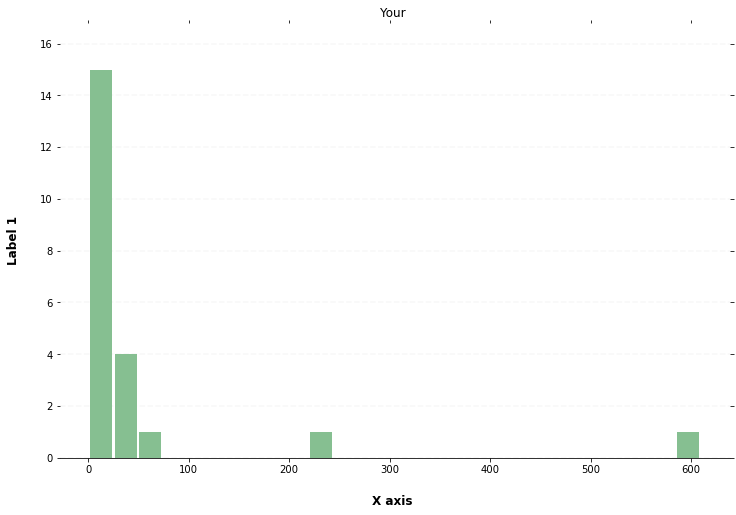

In [115]:
ax = starWars_sum.hist(column='is_licensed', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
        x.set_title("Your ")

    # Set x-axis label
    x.set_xlabel("X axis ", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Label 1", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

## How many units of star wars sold of all time 

In [113]:
starWars_sum=sorted_lice.groupby(['parent_theme']).sum().reset_index()
starWars_sum

new=starWars_sum.sort_values('is_licensed')
new



,parent_theme,year,num_parts,id,is_licensed,count
4,Disney,2016,4060.0,608,1,1
7,Ghostbusters,2016,552.0,607,1,1
1,Avatar,4012,0.0,634,2,2
0,Angry Birds,12096,1304.0,3636,6,6
2,Ben 10,12060,77.0,1620,6,6
14,Scooby-Doo,12091,845.0,3618,6,6
13,Prince of Persia,12060,1807.0,1626,6,6
6,Disney's Mickey Mouse,12005,431.0,2328,6,6
10,Jurassic World,14105,2092.0,4214,7,7
20,The Lone Ranger,16104,1173.0,4600,8,8


In [114]:

### How do you find out when Star Wars was the most popular set?
Solution 1
1)Filter the dataframe to display the sales for each year 

2)Find the sum of the sets 

3)Set up a graph for visualising the years 

Error-This won't work as it shall take lots of variables and loops to execute 

Solution 2-group_by, sort_values 
1)grouping df the DataFrame by the year aand the parent theme 
2)Checking which has the max among them 


SyntaxError: invalid syntax (3645321640.py, line 2)